In [6]:
import pandas as pd
import os
os.getcwd()

'/Users/franziskawollscheid/Documents/University/WS22:23/SGA/Übung 2/Uebung2'

In [7]:
data = pd.read_csv("data.csv")
data = data.drop('Unnamed: 0', axis=1)
data

,Datum,Uhrzeit,Kosten,time,wind,pv,Preis in kWh/€,Gewinn_Wind,Gewinn_PV,Gesamtgewinn
0,01.01.2019,00:00,28.32,2019-01-01 00:00:00,1.000,0.0,0.02832,0.028320,0.0,0.028320
1,01.01.2019,01:00,10.07,2019-01-01 01:00:00,1.038,0.0,0.01007,0.010453,0.0,0.010453
2,01.01.2019,02:00,-4.08,2019-01-01 02:00:00,1.184,0.0,-0.00408,-0.004831,-0.0,-0.004831
3,01.01.2019,03:00,-9.91,2019-01-01 03:00:00,1.402,0.0,-0.00991,-0.013894,-0.0,-0.013894
4,01.01.2019,04:00,-7.41,2019-01-01 04:00:00,1.574,0.0,-0.00741,-0.011663,-0.0,-0.011663
...,...,...,...,...,...,...,...,...,...,...
8755,31.12.2019,19:00,46.00,2019-12-31 19:00:00,1.546,0.0,0.04600,0.071116,0.0,0.071116
8756,31.12.2019,20:00,42.20,2019-12-31 20:00:00,1.949,0.0,0.04220,0.082248,0.0,0.082248
8757,31.12.2019,21:00,39.74,2019-12-31 21:00:00,2.040,0.0,0.03974,0.081070,0.0,0.081070
8758,31.12.2019,22:00,38.88,2019-12-31 22:00:00,1.942,0.0,0.03888,0.075505,0.0,0.075505


# Aufgabe 2

### Data preprocessing - auswählen der relevanten Daten

In [8]:
data = data[["time", "wind"]]
data

,time,wind
0,2019-01-01 00:00:00,1.000
1,2019-01-01 01:00:00,1.038
2,2019-01-01 02:00:00,1.184
3,2019-01-01 03:00:00,1.402
4,2019-01-01 04:00:00,1.574
...,...,...
8755,2019-12-31 19:00:00,1.546
8756,2019-12-31 20:00:00,1.949
8757,2019-12-31 21:00:00,2.040
8758,2019-12-31 22:00:00,1.942


### Aufgabe 2 a)
- Ziel: Windmenge vorhersagen für die Woche vom 02.12. bis 08.12. mit Hilfe der Daten der jeweils vorherigen Woche

In [9]:
#Woche 2.12.2019 bis 8.12.2019 zu beliebiger Uhrzeit (12:00) vorhersagen
#hierfür benötigt man die Daten vom 25.11. bis 8.12.
df = data[(data.time > '2019-11-24 23:00:00') & (data.time < '2019-12-09 00:00:00')]
df = df.reset_index(drop=True)
df

,time,wind
0,2019-11-25 00:00:00,0.112
1,2019-11-25 01:00:00,0.127
2,2019-11-25 02:00:00,0.179
3,2019-11-25 03:00:00,0.214
4,2019-11-25 04:00:00,0.212
...,...,...
331,2019-12-08 19:00:00,7.109
332,2019-12-08 20:00:00,6.330
333,2019-12-08 21:00:00,5.978
334,2019-12-08 22:00:00,5.942


In [10]:
# durchschnitte ermitteln
average = list()

for w in range(7):
    print(w,':Woche')#1. Iteration 25.11. -> 2.Iteration 26.11 (also w=24)
    w = w*24
    for i in range(24):#Stunde
        print('Startdatum',df.iloc[i+w].time)
        k=i+w+0
        summe=0
        for j in range(7):#Wochentag
            print(k)
            summe = summe + df.iloc[k].wind
            k = k+24
        durchschnitt = summe / 7
        print("durchschnitt:", durchschnitt)
        average.append(durchschnitt)

0 :Woche
Startdatum 2019-11-25 00:00:00
0
24
48
72
96
120
144
durchschnitt: 2.896857142857143
Startdatum 2019-11-25 01:00:00
1
25
49
73
97
121
145
durchschnitt: 2.8219999999999996
Startdatum 2019-11-25 02:00:00
2
26
50
74
98
122
146
durchschnitt: 2.7341428571428565
Startdatum 2019-11-25 03:00:00
3
27
51
75
99
123
147
durchschnitt: 2.649142857142858
Startdatum 2019-11-25 04:00:00
4
28
52
76
100
124
148
durchschnitt: 2.536142857142857
Startdatum 2019-11-25 05:00:00
5
29
53
77
101
125
149
durchschnitt: 2.529285714285714
Startdatum 2019-11-25 06:00:00
6
30
54
78
102
126
150
durchschnitt: 2.7021428571428574
Startdatum 2019-11-25 07:00:00
7
31
55
79
103
127
151
durchschnitt: 2.771714285714286
Startdatum 2019-11-25 08:00:00
8
32
56
80
104
128
152
durchschnitt: 2.6861428571428574
Startdatum 2019-11-25 09:00:00
9
33
57
81
105
129
153
durchschnitt: 2.4322857142857144
Startdatum 2019-11-25 10:00:00
10
34
58
82
106
130
154
durchschnitt: 2.225285714285714
Startdatum 2019-11-25 11:00:00
11
35
59
83


### 2. DataFrame für Benchmark erstellen (02.12-08.12.) UND berechnete Durchschnitte hinzufügen

In [11]:
benchmark = df
benchmark = benchmark[(benchmark.time > '2019-12-01 23:00:00') & (benchmark.time < '2019-12-09 00:00:00')]
benchmark = benchmark.reset_index(drop=True)
benchmark['benchmark_vorhersage'] = average
benchmark

,time,wind,benchmark_vorhersage
0,2019-12-02 00:00:00,0.893,2.896857
1,2019-12-02 01:00:00,0.719,2.822000
2,2019-12-02 02:00:00,0.679,2.734143
3,2019-12-02 03:00:00,0.794,2.649143
4,2019-12-02 04:00:00,0.875,2.536143
...,...,...,...
163,2019-12-08 19:00:00,7.109,1.940286
164,2019-12-08 20:00:00,6.330,1.978571
165,2019-12-08 21:00:00,5.978,2.073286
166,2019-12-08 22:00:00,5.942,2.186000


### Fehlermaß berechnen

In [12]:
#MeanSquaredError
#import numpy as np
#benchmark['abweichung^2'] = np.square(benchmark.benchmark_vorhersage - benchmark.wind)
#benchmark

In [13]:
#mse berechnen
#mse = 1/benchmark.shape[0] * benchmark['abweichung^2'].sum()
#print('Benchmark Fehler beträgt (MSE)', mse)


In [14]:
import numpy as np

def mse (actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual, pred)).mean() 


mse(benchmark.wind, benchmark.benchmark_vorhersage)

7.568151054907676

### Aufgabe 2 b) LSTM und Fully Connect Neuronal Net

In [15]:
#select daten Januar bis Ende November
train_data = data[(data.time < '2019-11-25')]
train_data = train_data.reset_index(drop=True)
train_data = train_data.drop('time', axis=1)
train_data

,wind
0,1.000
1,1.038
2,1.184
3,1.402
4,1.574
...,...
7867,0.259
7868,0.268
7869,0.299
7870,0.260


In [16]:
test_data = data[(data.time >= '2019-11-25') & (data.time < '2019-12-09 00:00:00')]
test_data = test_data.drop('time', axis=1)
test_data = test_data.reset_index(drop=True)
test_data

,wind
0,0.112
1,0.127
2,0.179
3,0.214
4,0.212
...,...
331,7.109
332,6.330
333,5.978
334,5.942


### x_train/ y_train/ x_test/ y_test erstellen
-> x_train sind immer die Daten von einer ganzen Woche (also shape = 168 (7x24). y ist dann der 169. Eintrag (das soll vorhergesagt werden)

In [17]:
import numpy as np
# Erstelle leere Matrix
x_train = np.empty((train_data.shape[0]-168, 168, 1))
y_train = np.empty((train_data.shape[0]-168, 1))
# Schleife über die Anzahl der Trainingssätze
for i in range(train_data.shape[0]-169):
    # Erstelle Trainingsdaten
    x = train_data.iloc[i:i+168].values
    y = train_data.iloc[i+169].values
    # Speichere die Werte in die Matrix

    x_train[i] = x.reshape(168,1)
    y_train[i] = y

In [18]:
import numpy as np
# Erstelle leere Matrix mit shape 7848 x 168 x 1 (7848 = test_data.len(192) - 168) (nochmal -1 damit kein IndexBoundaries überschreitung aufgrund von y gibt)
x_test = np.empty((test_data.shape[0]-168, 168, 1))
y_test = np.empty((test_data.shape[0]-168, 1))
# Schleife über die Anzahl der Trainingssätze
for i in range(test_data.shape[0]-169):
    # Erstelle Trainingsdaten
    x = test_data.iloc[i:i+168].values
    y = test_data.iloc[i+169].values
    # Speichere die Werte in die Matrix

    x_test[i] = x.reshape(168,1)
    y_test[i] = y

#### FCNN  (funktioniert nicht)
-> wahrscheinlich Daten nicht als 3D Matrix eingeben.

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

model = models.Sequential()
#model.add(layers.Flatten())  # takes our 28x28 and makes it 1x784
#add Input Layer
model.add(layers.Dense(8, activation='relu')) #x_train.shape = 28,28,1
#model.add(layers.Dense(32, activation='relu')) #x_train.shape = 28,28,1
model.add(layers.Dense(1, activation='relu')) #x_train.shape = 28,28,1
#add output layer
#model.add(layers.Dense(num_classes, activation='softmax'))   #10 because dataset is numbers from 0 - 9

model.build(x_train.shape) #um model.summary() zu bekommen
model.summary()

2023-01-16 18:08:07.974055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (7704, 168, 8)            16        
                                                                 
 dense_1 (Dense)             (7704, 168, 1)            9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


2023-01-16 18:08:11.387562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.compile(optimizer='adam', loss='mse')

In [21]:
history = model.fit(
    x_train,
    y_train,
    batch_size=12,
    epochs=10,
    validation_data=(x_test, y_test),
)

Epoch 1/10
642/642 [==============================] - 1s 954us/step - loss: 3.1816 - val_loss: 6.7560
Epoch 2/10
642/642 [==============================] - 0s 770us/step - loss: 2.9442 - val_loss: 6.4061
Epoch 3/10
642/642 [==============================] - 0s 767us/step - loss: 2.9394 - val_loss: 6.3861
Epoch 4/10
642/642 [==============================] - 0s 768us/step - loss: 2.9367 - val_loss: 6.3770
Epoch 5/10
642/642 [==============================] - 0s 773us/step - loss: 2.9355 - val_loss: 6.3572
Epoch 6/10
642/642 [==============================] - 1s 779us/step - loss: 2.9346 - val_loss: 6.3615
Epoch 7/10
642/642 [==============================] - 1s 779us/step - loss: 2.9340 - val_loss: 6.4193
Epoch 8/10
642/642 [==============================] - 0s 769us/step - loss: 2.9326 - val_loss: 6.3818
Epoch 9/10
642/642 [==============================] - 1s 783us/step - loss: 2.9374 - val_loss: 6.3780
Epoch 10/10
642/642 [==============================] - 1s 783us/step - loss: 2.935

In [22]:
predictions = model.predict(x_test)
predictions

6/6 [==============================] - 0s 968us/step


array([[[1.3398229],
        [1.3455957],
        [1.365608 ],
        ...,
        [1.5445637],
        [1.6110814],
        [1.6225617]],

       [[1.3455957],
        [1.365608 ],
        [1.3784381],
        ...,
        [1.6110814],
        [1.6225617],
        [1.6077049]],

       [[1.365608 ],
        [1.3784381],
        [1.3777628],
        ...,
        [1.6225617],
        [1.6077049],
        [1.548953 ]],

       ...,

       [[1.5445637],
        [1.6110814],
        [1.6225617],
        ...,
        [3.8939579],
        [3.70656  ],
        [3.4435275]],

       [[1.6110814],
        [1.6225617],
        [1.6077049],
        ...,
        [3.70656  ],
        [3.4435275],
        [3.3246734]],

       [[1.2616328],
        [1.2616328],
        [1.2616328],
        ...,
        [1.2616328],
        [1.2616328],
        [1.2616328]]], dtype=float32)

#### LSTM

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=(168,1))) # seq_length, input_size
#model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu')) # N, 28, 128
model.add(layers.LSTM(128, return_sequences=False, activation='sigmoid')) # N, 128
model.add(layers.Dense(1))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# loss and optimizer
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam(lr=0.001)
#metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim)

# training
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test),
)

Epoch 1/15


/Users/franziskawollscheid/opt/anaconda3/envs/sga/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


121/121 [==============================] - 21s 163ms/step - loss: 1.8476 - val_loss: 0.8177
Epoch 2/15
121/121 [==============================] - 18s 153ms/step - loss: 0.5876 - val_loss: 0.4377
Epoch 3/15
121/121 [==============================] - 19s 154ms/step - loss: 0.4995 - val_loss: 0.3941
Epoch 4/15
121/121 [==============================] - 19s 154ms/step - loss: 0.4452 - val_loss: 0.3136
Epoch 5/15
121/121 [==============================] - 19s 154ms/step - loss: 0.4131 - val_loss: 0.3025
Epoch 6/15
121/121 [==============================] - 19s 155ms/step - loss: 0.3883 - val_loss: 0.3115
Epoch 7/15
121/121 [==============================] - 19s 156ms/step - loss: 0.3671 - val_loss: 0.2476
Epoch 8/15
121/121 [==============================] - 19s 154ms/step - loss: 0.3560 - val_loss: 0.3008
Epoch 9/15
121/121 [==============================] - 19s 155ms/step - loss: 0.3437 - val_loss: 0.2263
Epoch 10/15
121/121 [==============================] - 19s 159ms/step - loss: 0.3299

In [25]:
predictions = model.predict(x_test)
benchmark['LSTM_Prediction'] = predictions
benchmark

6/6 [==============================] - 0s 36ms/step


,time,wind,benchmark_vorhersage,LSTM_Prediction
0,2019-12-02 00:00:00,0.893,2.896857,0.943878
1,2019-12-02 01:00:00,0.719,2.822000,0.896779
2,2019-12-02 02:00:00,0.679,2.734143,0.658494
3,2019-12-02 03:00:00,0.794,2.649143,0.731615
4,2019-12-02 04:00:00,0.875,2.536143,0.923410
...,...,...,...,...
163,2019-12-08 19:00:00,7.109,1.940286,7.185688
164,2019-12-08 20:00:00,6.330,1.978571,6.574380
165,2019-12-08 21:00:00,5.978,2.073286,5.733143
166,2019-12-08 22:00:00,5.942,2.186000,5.679717


In [26]:
import numpy as np

def mse (actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual, pred)).mean() 


mse(benchmark.wind, benchmark.LSTM_Prediction)
benchmark= benchmark[0:benchmark.shape[0]-1]

print('MSE für naive Vorhersage:', mse(benchmark.wind, benchmark.benchmark_vorhersage))
print('MSE für LSTM Vorhersage:', mse(benchmark.wind, benchmark.LSTM_Prediction))


MSE für naive Vorhersage: 7.5347209164120725
MSE für LSTM Vorhersage: 0.06906495400131228


<function matplotlib.pyplot.show(close=None, block=None)>

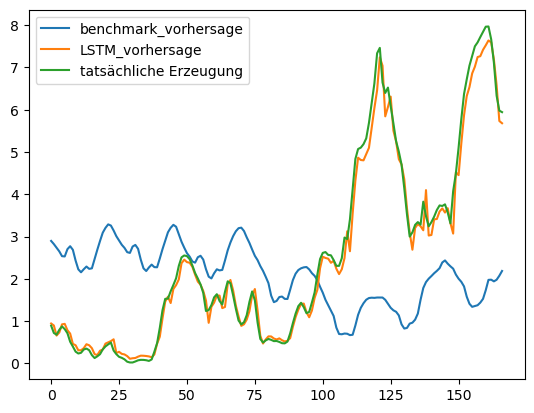

In [27]:
bm_v = benchmark[['benchmark_vorhersage']]
LSTMPred = benchmark[['LSTM_Prediction']]
erzeugung= benchmark[['wind']]

import matplotlib.pyplot as plt 

plt.figure()
plt.plot(bm_v, label = 'benchmark_vorhersage')
plt.plot(LSTMPred, label='LSTM_vorhersage')
plt.plot(erzeugung, label ='tatsächliche Erzeugung')
plt.legend()
plt.show